# Comparison of astroNN-DR17 and APOKASC-2 ages

In [1]:
from utils import *
from scipy.stats import norm
from scipy.optimize import curve_fit

# Plot settings
plt.rc(('xtick', 'ytick'), direction='in')
plt.rc('xtick', top=True)
plt.rc('ytick', right=True)
plt.rc('font', family='STIXgeneral')
plt.rc('figure', dpi=140)
plt.rc('figure', figsize=(4, 4))

In [19]:
data_dir = 'C:\\Users\\dubay.11\\OneDrive - The Ohio State University\\Documents\\Docs\\First Year Project\\Data'
data = pd.read_csv(Path(data_dir) / 'dr17_cut_data.csv')
data

,APOGEE_ID,TELESCOPE,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,...,APOKASC2_AGE,APOKASC2_AGE_PERR,APOKASC2_AGE_MERR,APOKASC2_AV,APOKASC2_AV_ERR,APOKASC2_NOTE,APOK2_MASS,APOK2_MASS_ERR,APOK2_RADIUS,APOK2_RADIUS_ERR
0,2M00000002+7417074,apo25m,120+12,none,0.000103,74.285408,119.401807,11.767414,8.597,0.039,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
1,2M00000032+5737103,apo25m,N7789,none,0.001335,57.619530,116.065371,-4.564768,10.905,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
2,2M00000035-7323394,lco25m,SMC12,none,0.001467,-73.394287,307.939441,-43.230305,15.008,0.045,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
3,2M00000068+5710233,apo25m,N7789,none,0.002850,57.173164,115.977154,-5.002392,10.664,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
4,2M00000133+5721163,apo25m,NGC7789_btx,none,0.005558,57.354549,116.014776,-4.824917,13.261,0.029,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408656,2M23595867-7339039,lco25m,SMC12,none,359.994493,-73.651093,307.846602,-42.982597,15.671,0.069,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408657,2M23595886+5726058,apo25m,116-04,none,359.995265,57.434956,116.025359,-4.745011,11.466,0.024,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408658,2M23595921+5609479,apo25m,NGC7789_MGA,none,359.996744,56.163330,115.771964,-5.991363,11.985,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408659,2M23595949-7342592,lco25m,SMC12,none,359.997887,-73.716454,307.821174,-42.919934,15.924,0.094,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN


## Finding targets with discrepant ages

A number of stars in the astroNN catalog have reported ages which differ greatly from the APOKASC-2 asteroseismic ages. Comparing the two ages here, it seems that a cut of (astroNN age - APOKASC age) < -5 Gyr distinguishes the truly discrepant ages from the intrinsic scatter about 0. Most of these stars have ages > 10 Gyr in the APOKASC catalog. According to Mackereth+ 2019, the neural net relies heavily on C and N bands, and its accuracy breaks down above 10 Gyr. In Figure A1, they show that astroNN severly underestimates ages above 10 Gyr, and also slightly overestimates ages for the youngest stars.

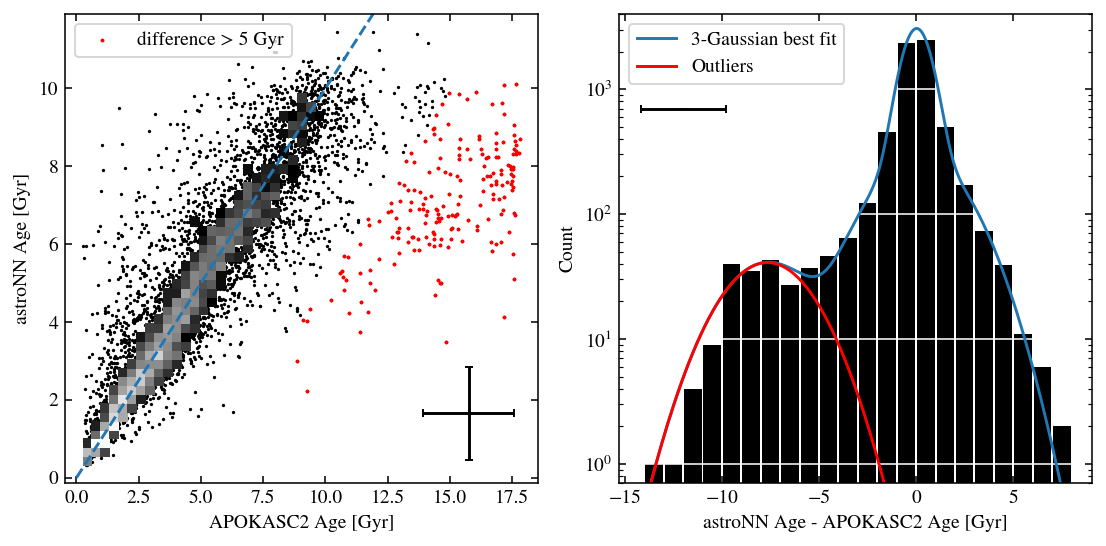

In [3]:
ages, low_age = get_discrepant_ages(data, diff_cut=-5)
low_age.to_csv('age_discrep.csv')

# APOKASC age vs astroNN age
fig, axs = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True)

ax = axs[0]
scatter_hist(ax, ages['APOKASC2_AGE'], ages['ASTRONN_AGE'])
ax.scatter(low_age['APOKASC2_AGE'], low_age['ASTRONN_AGE'], c='r', s=1, label='difference > 5 Gyr')
plot_rms_err(ax, ages[['APOKASC2_AGE_MERR', 'APOKASC2_AGE_PERR']], ages['ASTRONN_AGE_ERR'], loc='lower right')
ax.legend(loc='upper left')
ax.plot([0, 12], [0, 12], linestyle='--')
ax.set_xlabel('APOKASC2 Age [Gyr]')
ax.set_ylabel('astroNN Age [Gyr]')

# Histrogram of age differences
ax = axs[1]
xmin = -14
xmax = 8
bins = np.linspace(xmin, xmax, xmax-xmin+1)
y, x, _ = ax.hist(ages['AGE_DIFF'], color='k', bins=bins, rwidth=0.9)
ax.grid(which='major', axis='y', color='w')
plot_rms_err(ax, ages[['AGE_DIFF_MERR', 'AGE_DIFF_PERR']], [0], loc=(-12, 700))

def trimodal_norm(x, loc1, scale1, a1, loc2, scale2, a2, loc3, scale3, a3):
    """Trimodal Gaussian to fit to age difference."""
    return a1 * norm.pdf(x, loc1, scale1) + a2 * norm.pdf(x, loc2, scale2) + a3 * norm.pdf(x, loc3, scale3)

# best fit trimodal normal
x = x[:-1] + (x[1] - x[0])/2
params, cov = curve_fit(trimodal_norm, x, y, p0=(0, 0.5, 5e3, 0, 2, 1e3, -9, 2, 40))
x_fine = np.arange(xmin, xmax, 0.1)
ax.plot(x_fine, trimodal_norm(x_fine, *params), label='3-Gaussian best fit')
# individual distributions
ax.plot(x_fine, params[8] * norm.pdf(x_fine, *params[6:8]), c='r', label='Outliers')
# plot settings
ax.set_yscale('log')
ax.set_xlabel('astroNN Age - APOKASC2 Age [Gyr]')
ax.set_ylabel('Count')
ax.set_ylim((7e-1, 4e3))
ax.legend()

plt.savefig('age_diffs.png', dpi=300)
plt.show()

## ASPCAP signal-to-noise

The stars with age discrepancies don't seem to have a significantly lower S/N in ASPCAP than the general population of APOKASC-2 targets.

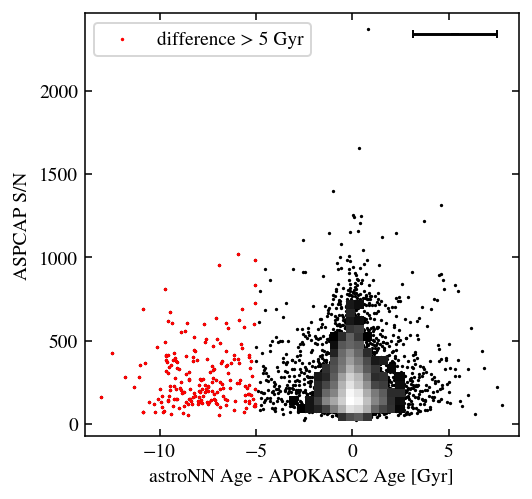

In [4]:
fig, ax = plt.subplots()
scatter_hist(ax, ages['AGE_DIFF'], ages['SNREV'])
ax.scatter(low_age['AGE_DIFF'], low_age['SNREV'], s=.6, c='r', label='difference > 5 Gyr')
plot_rms_err(ax, ages[['AGE_DIFF_MERR', 'AGE_DIFF_PERR']], [0], loc='upper right')
ax.set_xlabel('astroNN Age - APOKASC2 Age [Gyr]')
ax.set_ylabel('ASPCAP S/N')
ax.legend()
plt.show()

## Comparison of stellar parameters and age discrepancies

For stars with APOKASC-2 ages (i.e., red giants), astroNN agrees well with parameters determined by APOKASC and ASPCAP. The offset in [O/Fe] is just due to ASPCAP's method for determining alpha abundances. This good agreement does not go away when looking at the stars with age discrepancies, and in fact these stars seem inhabit the same parameter space as the general population - with the notable exception of log(g), and possibly T_eff.

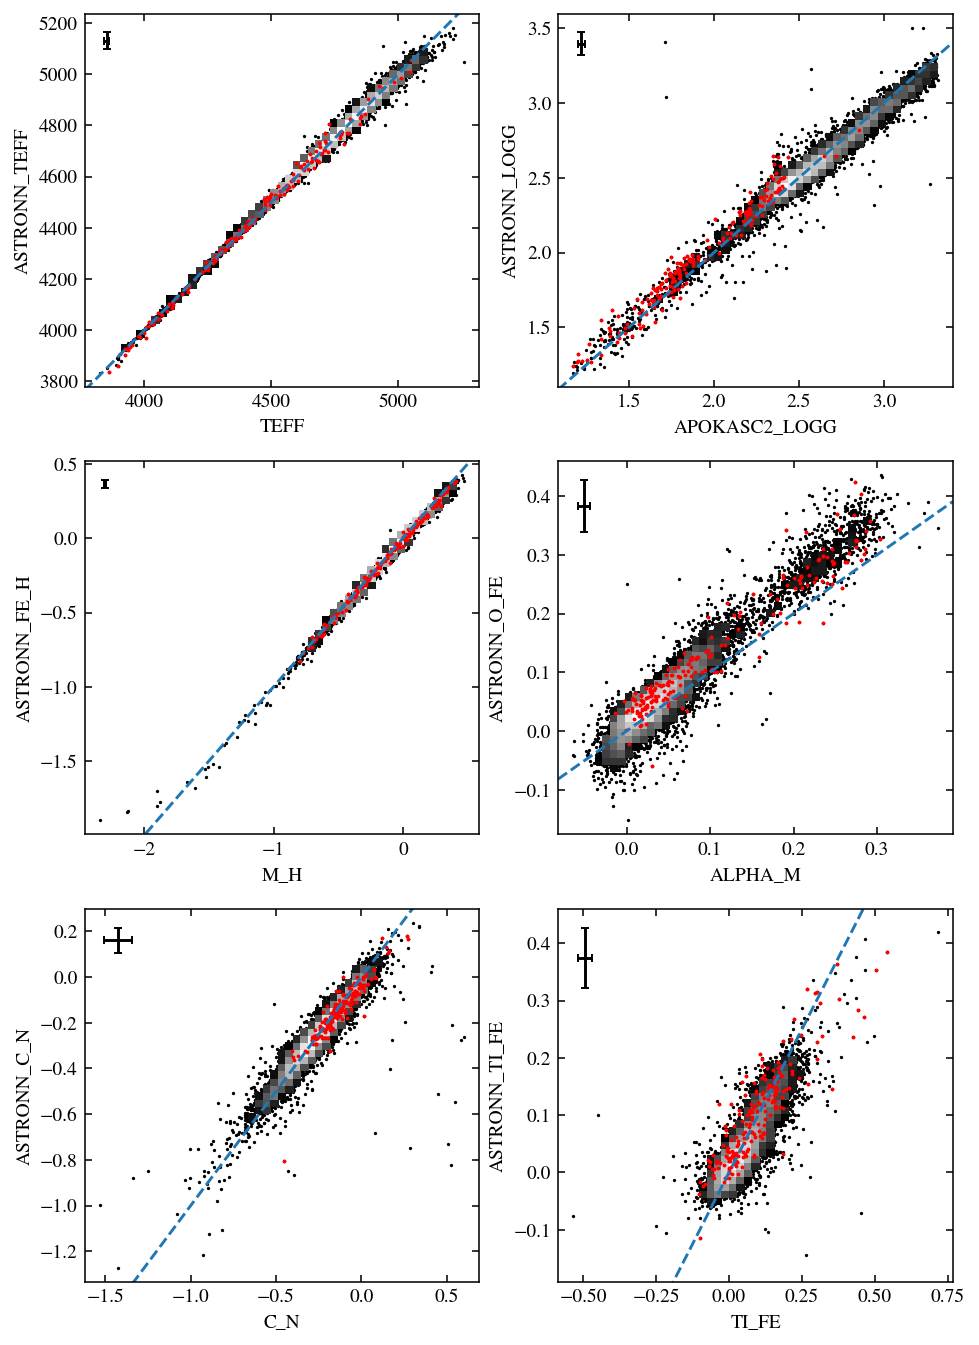

In [5]:
def compare_aspcap_astronn(ax, col1, col2, errcol1=None, errcol2=None, 
                           errloc='upper left', outlier_label=None, legend_loc='best'):
    # Compare the same quantity from APOKASC-2/ASPCAP and astroNN
    if not errcol1:
        errcol1 = col1 + '_ERR'
    if not errcol2:
        errcol2 = col2 + '_ERR'
    scatter_hist(ax, ages[col1], ages[col2])
    ax.scatter(low_age[col1], low_age[col2], c='r', s=1, label=outlier_label)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.plot(xlim, xlim, linestyle='--')
    plot_rms_err(ax, ages[errcol1].dropna(), ages[errcol2].dropna(), loc=errloc)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    if outlier_label != None:
        ax.legend(loc=legend_loc)

fig, axs = plt.subplots(3, 2, figsize=(8, 12))
ax = axs[0,0]
compare_aspcap_astronn(ax, 'TEFF', 'ASTRONN_TEFF')
ax = axs[0,1]
compare_aspcap_astronn(ax, 'APOKASC2_LOGG', 'ASTRONN_LOGG', errcol1='APOKASC2_LOGG_RANERR')
ax = axs[1,0]
compare_aspcap_astronn(ax, 'M_H', 'ASTRONN_FE_H')
ax = axs[1,1]
compare_aspcap_astronn(ax, 'ALPHA_M', 'ASTRONN_O_FE')
ax = axs[2,0]
compare_aspcap_astronn(ax, 'C_N', 'ASTRONN_C_N')
ax = axs[2,1]
compare_aspcap_astronn(ax, 'TI_FE', 'ASTRONN_TI_FE')
plt.show()

Looking at age vs log(g) from APOKASC-2, the reason why the age-discrepant stars populate the low-log(g) regime is just because the age-discrepant stars are all really old in APOKASC, therefore less massive, therefore lower log(g) in their giant phase. This isn't an indication of an actual difference between astroNN and APOKASC in log(g).

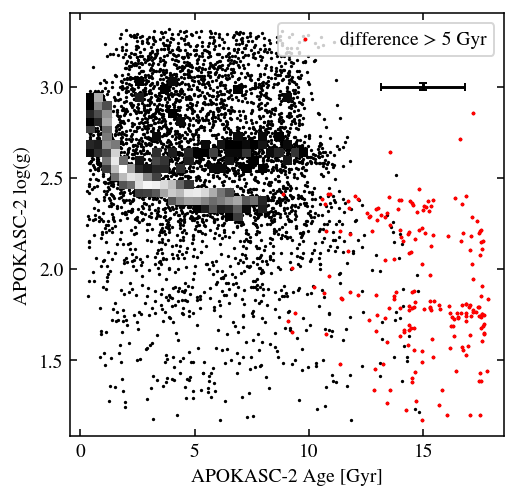

In [6]:
fig, ax = plt.subplots()
scatter_hist(ax, ages['APOKASC2_AGE'], ages['APOKASC2_LOGG'])
ax.scatter(low_age['APOKASC2_AGE'], low_age['APOKASC2_LOGG'], c='r', s=1, label='difference > 5 Gyr')
plot_rms_err(ax, ages[['APOKASC2_AGE_MERR', 'APOKASC2_AGE_PERR']], ages['APOKASC2_LOGG_RANERR'], loc=(15, 3))
ax.legend(loc='upper right')
ax.set_xlabel('APOKASC-2 Age [Gyr]')
ax.set_ylabel('APOKASC-2 log(g)')
plt.show()

Looking more closely at the age vs [C/N] plot, 

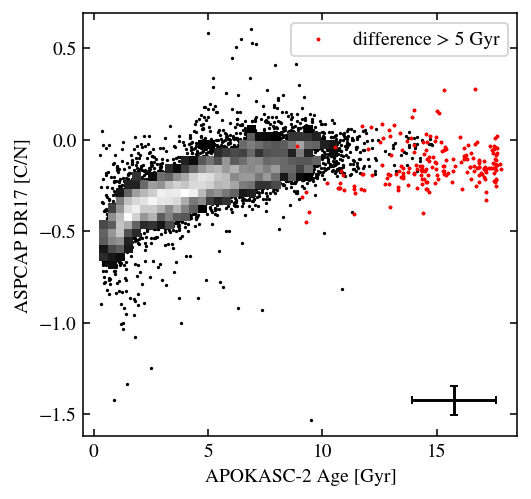

In [7]:
fig, ax = plt.subplots()
scatter_hist(ax, ages['APOKASC2_AGE'], ages['C_N'])
ax.scatter(low_age['APOKASC2_AGE'], low_age['C_N'], c='r', s=1, label='difference > 5 Gyr')
plot_rms_err(ax, ages[['APOKASC2_AGE_MERR', 'APOKASC2_AGE_PERR']], ages['C_N_ERR'], loc='lower right')
ax.legend()
ax.set_xlabel('APOKASC-2 Age [Gyr]')
ax.set_ylabel('ASPCAP DR17 [C/N]')
plt.show()

## *Gaia* and ASPCAP CMD

The age-discrepant stars seem to mostly lie along the RGB rather than on the red clump.

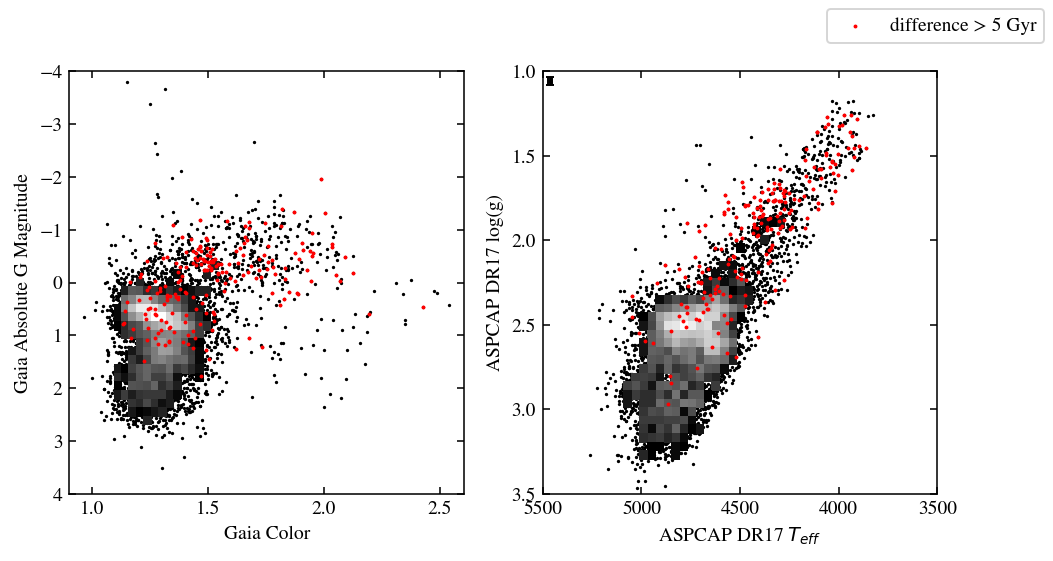

In [8]:
cmd = get_gaia_cmd_new(data)
cmd_ages, cmd_low_age = get_discrepant_ages(cmd, diff_cut=-5)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Gaia CMD
ax = axs[0]
scatter_hist(ax, cmd_ages['GAIAEDR3_COLOR'], cmd_ages['GAIAEDR3_ABS_MAG'], ylim=(-4, 4))
ax.scatter(cmd_low_age['GAIAEDR3_COLOR'], cmd_low_age['GAIAEDR3_ABS_MAG'], 
           c='r', s=1, label='difference > 5 Gyr')
ax.set_ylim((4, -4))
ax.set_xlabel('Gaia Color')
ax.set_ylabel('Gaia Absolute G Magnitude')

# ASPCAP parameter CMD
ax = axs[1]
scatter_hist(ax, ages['TEFF'], ages['LOGG'], 
             xlim=(3500, 5500), ylim=(1, 3.5))
ax.scatter(low_age['TEFF'], low_age['LOGG'], c='r', s=1)
plot_rms_err(ax, ages['TEFF_ERR'], ages['LOGG_ERR'], loc='lower right')
ax.set_xlim((5500, 3500))
ax.set_ylim((3.5, 1))
ax.set_xlabel('ASPCAP DR17 $T_{eff}$')
ax.set_ylabel('ASPCAP DR17 log(g)')

fig.legend()
plt.show()

## Data Flags

There doesn't appear to be one particular flag which is over-represented in the age-discrepant sample.

In [9]:
def count_flags(cat, flag_type):
    """
    Count the number of times each flag is raised in the DataFrame.
    
    """
    # Choose flag column
    if 'targ' in flag_type.lower():
        flag_col = 'TARGFLAGS'
    elif 'aspcap' in flag_type.lower():
        flag_col = 'ASPCAPFLAGS'
    else:
        return {}
    
    cat = cat.copy()
    # List of all unique flags
    flags = list(dict.fromkeys(','.join(cat[flag_col].to_list()).split(',')))
    flags_count = {}
    # Count occurrences of each flag
    for f in flags:
        is_flag = cat[flag_col].str.contains(f)
        flags_count[f] = is_flag.value_counts()[True]
    return flags_count

aspcap_flags = pd.DataFrame.from_dict(count_flags(ages, 'aspcap'), orient='index', columns=['ALL'])
aspcap_flags = aspcap_flags.join(pd.DataFrame.from_dict(count_flags(low_age, 'aspcap'), 
                                                        orient='index', columns=['LOW_AGE']))
aspcap_flags = aspcap_flags.fillna(0).astype(int)
print(aspcap_flags)

target_flags = pd.DataFrame.from_dict(count_flags(ages, 'target'), orient='index', columns=['ALL'])
target_flags = target_flags.join(pd.DataFrame.from_dict(count_flags(low_age, 'target'), 
                                                  orient='index', columns=['LOW_AGE']))
target_flags = target_flags.fillna(0).astype(int)
print(target_flags)

                ALL  LOW_AGE
none           6050      180
VMICRO_WARN     231        5
N_M_WARN         68        4
VSINI_WARN       35        0
TEFF_WARN        25        4
STAR_WARN       140       10
COLORTE_WARN    112        6
LOGG_WARN         3        0
C_M_WARN          1        0
SN_BAD            2        0
M_H_WARN          1        0
ROTATION_WARN     1        0
                                            ALL  LOW_AGE
APOGEE_ANCILLARY                           2925       79
APOGEE_KEPLER_SEISMO                       6043      161
APOGEE_KEPLER_COOLDWARF                      56        8
APOGEE_KEPLER_HOST                            3        0
APOGEE_WISE_DERED                            43        6
APOGEE_SHORT                                101        9
APOGEE_KEPLER_SEISMOAPOGEE2_KOI_CONTROL       3        0
APOGEE_KEPLER_SEISMOAPOGEE2_EB                1        0
APOGEE_KEPLER_SEISMOAPOGEE2_KOI               8        0
APOGEE2_KOI                                  10      

## RV scatter

What is the relationship between the difference in ages and the measured radial velocities, or the scatter in RV? The following plot shows the distributions in RV of three categories: stars where the astroNN age is >5 Gyr younger than the APOKASC-2 age(left), stars where the two ages agree to within 2 Gyr (right), and stars in the middle (center). The left half of each violin is the average of all the visit RVs measured by APOGEE, while the right half is the RV measured by Gaia. The two halves agree quite well for all three categories. There's a shallow trend toward a more negative median RV and larger spread in RV for the more discrepant ages, but all of the distributions are much broader than the differences between them.

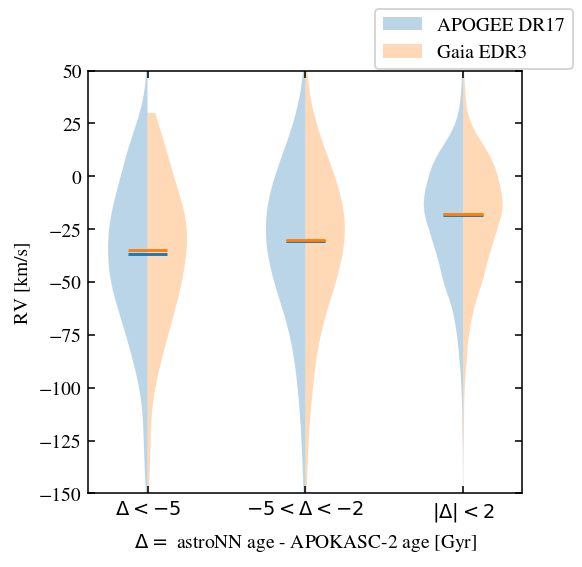

In [10]:
best_age = ages[np.abs(ages['AGE_DIFF']) < 2]
good_age = ages[(ages['AGE_DIFF'] > -5) & (ages['AGE_DIFF'] < -2)]

fig, ax = plt.subplots()
# Plot APOGEE average RVs
apogee_vln = ax.violinplot([low_age['VHELIO_AVG'], good_age['VHELIO_AVG'], best_age['VHELIO_AVG']], 
                           showmedians=True, showextrema=False)
# Cut violins in half
for b in apogee_vln['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
#     b.set_color('r')

# Plot Gaia EDR3 RVs
gaia_rv_col = 'GAIAEDR3_DR2_RADIAL_VELOCITY'
low_age_gaia_rv = low_age[pd.notna(low_age[gaia_rv_col])][gaia_rv_col]
good_age_gaia_rv = good_age[pd.notna(good_age[gaia_rv_col])][gaia_rv_col]
best_age_gaia_rv = best_age[pd.notna(best_age[gaia_rv_col])][gaia_rv_col]
gaia_vln = ax.violinplot([low_age_gaia_rv, good_age_gaia_rv, best_age_gaia_rv], showmedians=True, showextrema=False)
# Cut violins in half
for b in gaia_vln['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further left than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
#     b.set_color('b')

ax.set_xticks([1, 2, 3])
ax.set_xticklabels([r'$\Delta<-5$', r'$-5 < \Delta < -2$', r'$|\Delta|<2$'])
ax.set_xlabel(r'$\Delta =$ astroNN age - APOKASC-2 age [Gyr]')
ax.set_ylabel('RV [km/s]')
ax.set_ylim((-150, 50))

fig.legend([apogee_vln['bodies'][0], gaia_vln['bodies'][0]], ['APOGEE DR17', 'Gaia EDR3'])

plt.show()

In [11]:
print(np.median(low_age['VHELIO_AVG']))
print(np.median(good_age['VHELIO_AVG']))
print(np.median(best_age['VHELIO_AVG']))

-36.53649
-30.67803
-18.172887000000003


A similar plot, but plotting the inter-visit RV scatter from APOGEE. Again, we see slightly higher scatter for the most discrepant ages, but it looks like the median values are well within all three $1\sigma$ of each other.

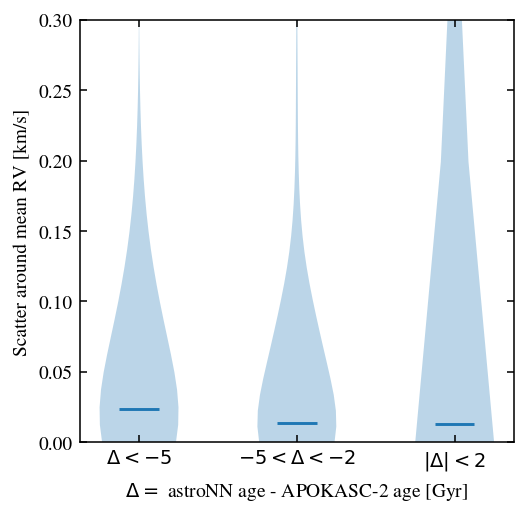

In [12]:
best_age = ages[np.abs(ages['AGE_DIFF']) < 2]
good_age = ages[(ages['AGE_DIFF'] > -5) & (ages['AGE_DIFF'] < -2)]

fig, ax = plt.subplots()
ax.violinplot([low_age['VSCATTER'], good_age['VSCATTER'], best_age['VSCATTER']], 
              showmedians=True, showextrema=False)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels([r'$\Delta<-5$', r'$-5 < \Delta < -2$', r'$|\Delta|<2$'])
ax.set_xlabel(r'$\Delta =$ astroNN age - APOKASC-2 age [Gyr]')
ax.set_ylabel('Scatter around mean RV [km/s]')
ax.set_ylim((0, 0.3))

plt.show()

A scatter plot of age difference vs APOGEE RV. I don't think this shows much besides that the number of ages in close agreement is much higher than the number of discrepant ages.

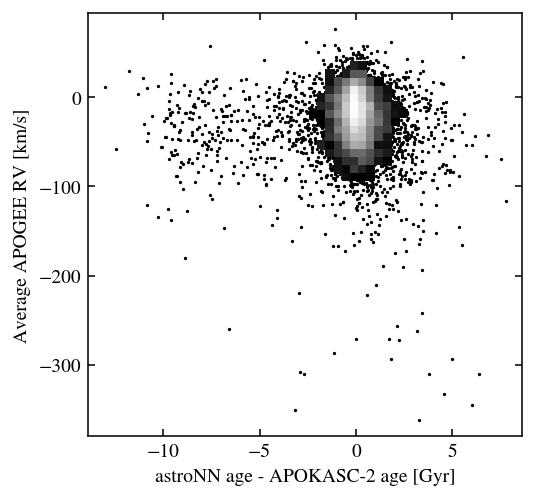

In [13]:
fig, ax = plt.subplots()
scatter_hist(ax, ages['AGE_DIFF'], ages['VHELIO_AVG'])
ax.set_xlabel('astroNN age - APOKASC-2 age [Gyr]')
ax.set_ylabel('Average APOGEE RV [km/s]')
plt.show()

## alpha vs [Fe/H]

Alpha abundance vs metallicity, with the stars with discrepant ages highlighted as red points.

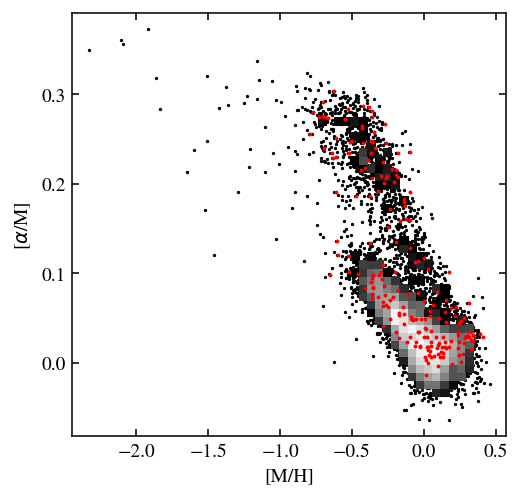

In [14]:
fig, ax = plt.subplots()
scatter_hist(ax, ages['FE_H'], ages['ALPHA_M'])#, xlim=(-1, 0.5))
ax.scatter(low_age['M_H'], low_age['ALPHA_M'], c='r', s=1)
ax.set_xlabel('[M/H]')
ax.set_ylabel(r'[$\alpha$/M]')
plt.show()

Comparison of the distributions of all stars with APOKASC-2 ages and those with discrepant ages in metallicity and alpha-abundance space. The blue histogram traces 3% of the total, which is where we would expect to see the red histogram if age discrepancy was independent of metallicity. On the left plot, we see that low-[M/H] stars may be slightly more common than we expect. On the right plot, the high-$\alpha$ stars seem to be over-represented in the discrepant set compared to the total.

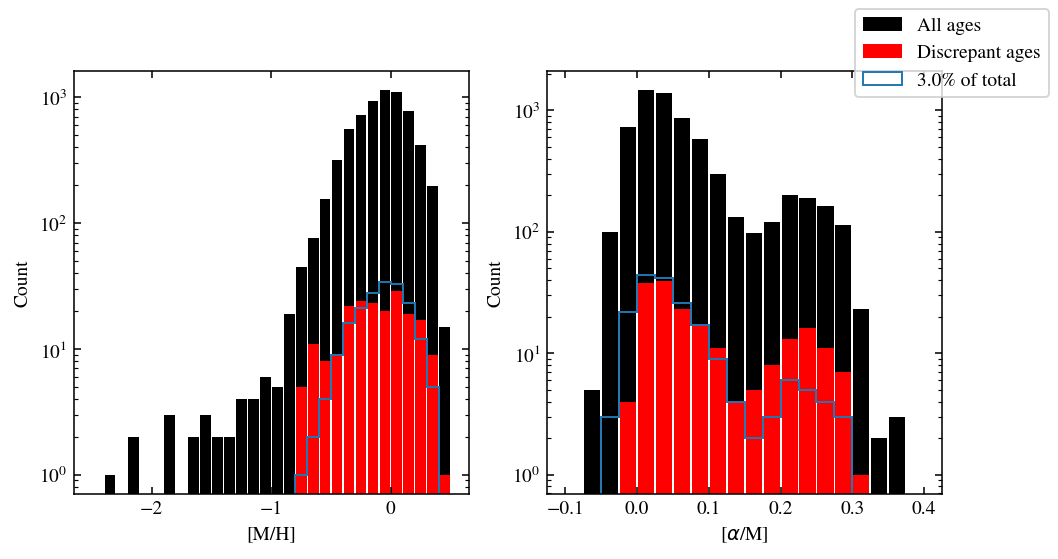

In [15]:
low_age_frac = low_age.shape[0] / ages.shape[0]
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
ax = axs[0]
mbins = np.linspace(-2.5, 0.5, 31)
hist = ax.hist(ages['M_H'], color='k', rwidth=0.9, bins=mbins, label='All ages')
ax.hist(low_age['M_H'], color='r', rwidth=0.9, bins=mbins, label='Discrepant ages')
ax.hist(hist[1][:-1], weights=np.floor(low_age_frac*hist[0]), bins=mbins, histtype='step', 
        label=f'{100*low_age_frac:.01f}% of total')
ax.set_yscale('log')
ax.set_xlabel('[M/H]')
ax.set_ylabel('Count')

ax = axs[1]
abins = np.linspace(-0.1, 0.4, 21)
hist = ax.hist(ages['ALPHA_M'], color='k', rwidth=0.9, bins=abins)
ax.hist(low_age['ALPHA_M'], color='r', rwidth=0.9, bins=abins)
ax.hist(hist[1][:-1], weights=np.floor(low_age_frac*hist[0]), bins=abins, histtype='step')
ax.set_yscale('log')
ax.set_xlabel(r'[$\alpha$/M]')
ax.set_ylabel('Count')

fig.legend()

plt.show()

## Distances

Similar to above but for distances based on Gaia parallax. I've just done a simple conversion from Gaia parallax to distance and haven't done any error propagation yet. Here it seems like stars with discrepant ages are far more likely (up to 10 times) to be at farther distances compared to the total set, and less likely to be within 2 kpc.

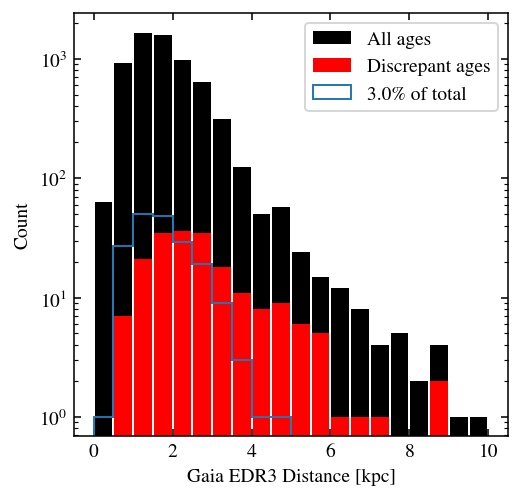

In [16]:
fig, ax = plt.subplots()
bins = np.linspace(0, 10, 21)
hist = ax.hist(get_gaia_cmd_new(ages)['GAIAEDR3_DIST']/1000, color='k', rwidth=0.9, bins=bins, label='All ages')
ax.hist(get_gaia_cmd_new(low_age)['GAIAEDR3_DIST']/1000, color='r', rwidth=0.9, bins=bins, label='Discrepant ages')
ax.hist(hist[1][:-1], weights=np.floor(low_age_frac*hist[0]), bins=bins, histtype='step',
        label=f'{100*low_age_frac:.01f}% of total')
ax.set_yscale('log')
ax.set_xlabel('Gaia EDR3 Distance [kpc]')
ax.set_ylabel('Count')
ax.legend()
plt.show()